In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style('ticks')

import warnings
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

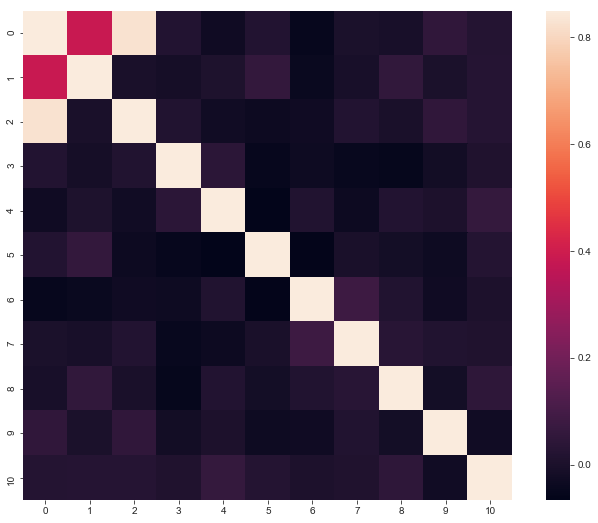

In [2]:
n = 1000 #(limit)

p = 10

X = np.random.normal(size=n * p).reshape((n, p))

y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

sns.heatmap(corrmat, vmax=.85, square=True)
plt.show()

The R-squared regression is: 0.8378647782352402
The R-squared PLSR is: 0.8378518817929834


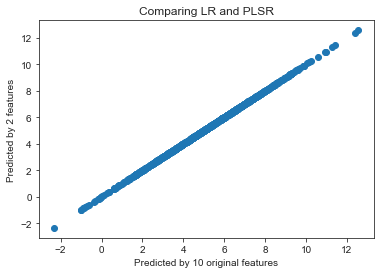

In [3]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('The R-squared regression is:', regr.score(X, y))

pls1 = PLSRegression(n_components=2)

pls1.fit(X, y)

Y_PLS_pred = pls1.predict(X)
print('The R-squared PLSR is:', pls1.score(X, y))

plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by 10 original features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR')
plt.show()

The R-squared regression is: 0.8378647782352402
The R-squared PLSR is: 0.8326265767886901


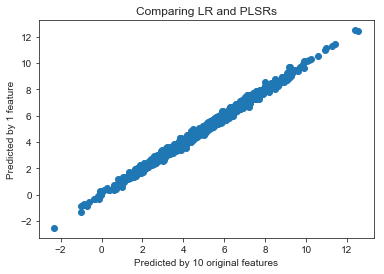

In [4]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('The R-squared regression is:', regr.score(X, y))

pls1 = PLSRegression(n_components=1)

pls1.fit(X, y)

Y_PLS_pred = pls1.predict(X)
print('The R-squared PLSR is:', pls1.score(X, y))

plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by 10 original features')
plt.ylabel('Predicted by 1 feature')
plt.title('Comparing LR and PLSRs')
plt.show()
#After reducing it to 1 feature, the R-squared PLSR went down by more than 0.005 compared to "Predicted by 2 Features".